> Created on Thu Jul  9 22:10:09 2020  @author: Richie Bao-caDesign设计(cadesign.cn)

## 1 核密度估计与地理空间点密度分布
### 1.1 核密度估计
#### 1.1.1 单变量（一维数组）的核密度估计
当直方图的组距无限缩小至极限后，能够拟合出一条曲线，计算这个分布曲线的公式即为概率密度函数（Probability Density Function,PDF），这是在[正态分布](https://richiebao.github.io/Urban-Spatial-Data-Analysis_python/#/./notebook_code/normalDis_PDF_outliers)一节中所阐述的内容，而用于估计概率密度函数的非参数方法就是核密度估计。核密度估计（Kernel density estimation, KDE）是一个基本的数据平滑问题（a fundamental data smoothing problem），例如对不平滑的直方图平滑，给定一个核K, 并指定带宽（bandwidth），其值为正数，核密度估计定义为： $\hat{f} _{n} (x)= \frac{1}{nh}  \sum_{i=1}^n {K( \frac{x- x_{i} }{h} )} $，其中K为核函数，$h$为带宽，核函数有多个，例举其中高斯核为：$\frac{1}{ \sqrt{2 \pi } }  e^{- \frac{1}{2}  x^{2} } $，将其带入核密度估计公式结果为：$\hat{f} _{n} (x)= \frac{1}{ \sqrt{2 \pi } nh}  \sum_{i=1}^n { e^{ -\frac{ (x- x_{i} )^{2} }{2 h^{2} } } } $。

在下述代码中绘制了三条曲线，红色粗线为概率密度函数；两条细线均为核密度估计（高斯核），只是蓝色线是依据核密度公式直接编写代码，并设置带宽h=0.4；绿色线则是使用scipy库下的`stats.gaussian_kde()`方法计算高斯核密度估计。

> 非参数统计（Nonparametric Statistics）是统计的一个分支，但不是完全基于参数化的概率分布,例如通过参数均值和方差（或标准差）定义一个正态分布，非参数统计基于自由分布（distribution-free）或指定的分布但未给分布参数，例如当处理PDF的一般情况时，不能像正态分布那样给定参数进行分类。其基本思想是在尽可能少的假定时，利用数据对一个未知量做出推断，通常意味着利用具有无穷维的统计模型。 

> 对于核密度估计名词中密度一词可以形象理解为下图中橄榄绿小竖线的分布密度。

参考：Wikipedia以及 Larry Wasserman.All of nonparametric statistics.Springer (October 21, 2005),中文版为：[美]Larry Wasserman.吴喜之译.现代非参数统计[M].可续出版社,北京.2008.5；Urmila Diwekar,Amy David.Bonus algorithm for large scale stochastic nonlinear programming problems.Springer; 2015 edition (March 5, 2015)

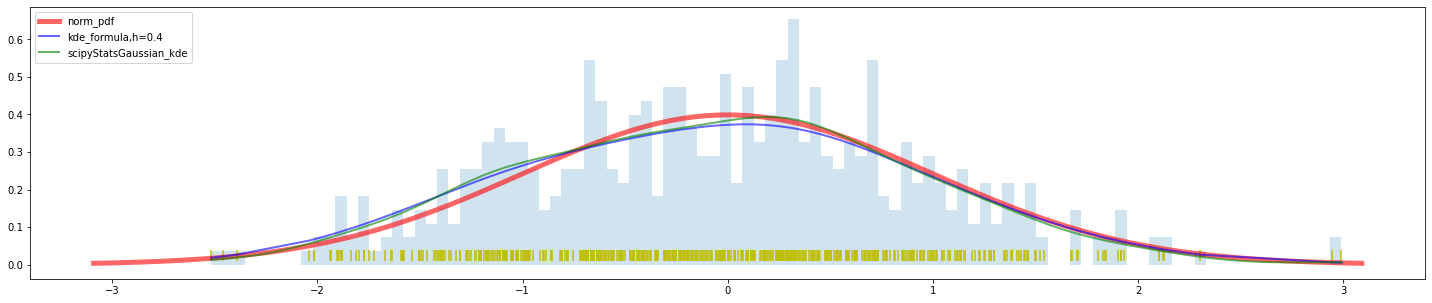

In [139]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import math
x=np.linspace(stats.norm.ppf(0.001,loc=0,scale=1),stats.norm.ppf(0.999,loc=0,scale=1), 100) #如果不给参数loc和scale,则默认为标准正态分布，即loc=0, scale=1
pdf=stats.norm.pdf(x)

plt.figure(figsize=(25,5))
plt.plot(x,pdf,'r-', lw=5, alpha=0.6, label='norm_pdf')


random_variates=stats.norm.rvs(loc=0,scale=1,size=500)
count, bins, ignored =plt.hist(random_variates,bins=100,density=True,histtype='stepfilled',alpha=0.2)
plt.eventplot(random_variates,color='y',linelengths=0.03,lineoffsets=0.025)

rVar_sort=np.sort(random_variates)
h=0.4
n=len(rVar_sort)
kde_Gaussian=[sum(math.exp(-1*math.pow(vi-vj,2)/(2*math.pow(h,2))) for vj in rVar_sort)/(h*n*math.sqrt(2*math.pi)) for vi in rVar_sort] #将上述高斯核密度估计公式转换为代码
plt.plot(rVar_sort,kde_Gaussian,'b-', lw=2, alpha=0.6, label='kde_formula,h=%s'%h)

scipyStatsGaussian_kde=stats.gaussian_kde(random_variates)
plt.plot(bins,scipyStatsGaussian_kde(bins),'g-', lw=2, alpha=0.6, label='scipyStatsGaussian_kde')
plt.legend()
plt.show()

带宽（bandwidth）影响光滑的程度，下述实验设置不同的值，观察核密度曲线的变化情况。关于最适宜的带宽推断，<em>Bonus algorithm for large scale stochastic nonlinear programming problems</em>第3章，<em>Probability Density Function and Kernel Density Estimation</em>一节中提到一种方法。

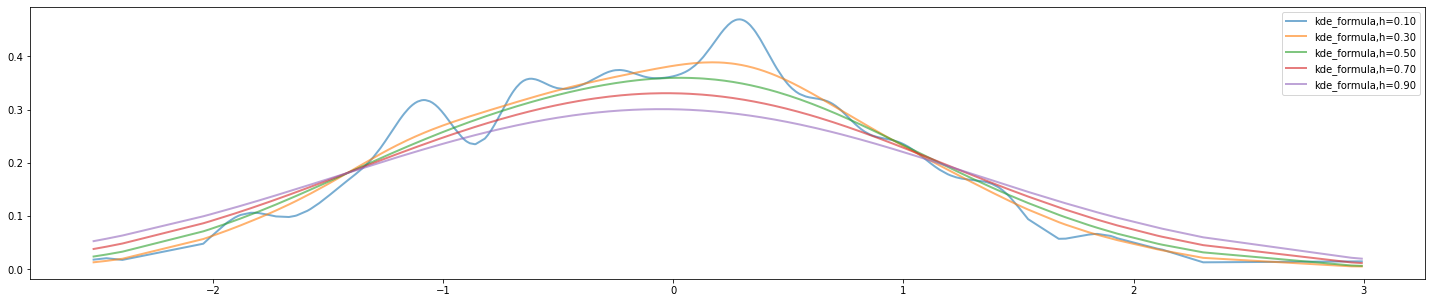

In [155]:
bws=np.arange(0.1,1,0.2)
colors_kde=['C{}'.format(i) for i in range(len(bws))] #maplotlib库颜色映射
i=0
plt.figure(figsize=(25,5))
for h in bws:
    kde_Gaussian=[sum(math.exp(-1*math.pow(vi-vj,2)/(2*math.pow(h,2))) for vj in rVar_sort)/(h*n*math.sqrt(2*math.pi)) for vi in rVar_sort] #将上述高斯核密度估计公式转换为代码
    plt.plot(rVar_sort,kde_Gaussian,color=colors_kde[i], lw=2, alpha=0.6, label='kde_formula,h=%.2f'%h)
    i+=1
plt.legend()
plt.show()

#### 1.1.2 多变量（多维数组）的核密度估计

In [66]:
kde_Gaussian[0]

<generator object <listcomp>.<genexpr> at 0x0000023B1248FEC8>

In [145]:
bws=np.arange(0.1,1,0.2)
colors=['C{}'.format(i) for i in range(len(bws))]

In [147]:
colors

['C0', 'C1', 'C2', 'C3', 'C4']